In [86]:
import numpy as np 
import pandas as pd

In [87]:
# import dataset
df = pd.read_csv('/Users/I578070/Desktop/Sms-Spam-Classifier/spam.csv', encoding='latin-1')

In [88]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [89]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [91]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [92]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [93]:
df.notnull().sum()

v1    5572
v2    5572
dtype: int64

In [94]:
df.shape

(5572, 2)

Renaming the columns

In [95]:
df.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)
df.sample(5)

type                                               text
5281  ham             And how you will do that, princess? :)
3605  ham  That means you got an A in epi, she.s fine. Sh...
3093  ham  Have you emigrated or something? Ok maybe 5.30...
177   ham  Turns out my friends are staying for the whole...
1657  ham  S:-)if we have one good partnership going we w...

In [96]:
print(df.to_markdown())

|      | type   | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|-----:|:-------|:---------------------------------------------------

In [97]:
# to check if there are any null values
df.isnull().sum()

type    0
text    0
dtype: int64

In [98]:
# encoding the text data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
df.head()

type                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...

In [99]:
# to check if there are any duplicate values
df.duplicated().sum()

403

In [100]:
df = df.drop_duplicates(keep='first') # keep the first occurence and drop the rest
df.duplicated().sum()

0

In [101]:
df.shape

(5169, 2)

# Exploratory data analysis or EDA

In [102]:
df.head()

type                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...

In [103]:
# check the number of spam and ham messages
df['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

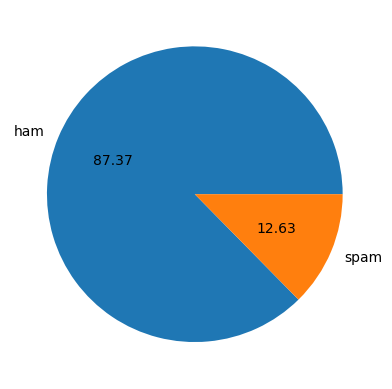

In [104]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [105]:
for index, label in enumerate(encoder.classes_):
    print(f"{label} → {index}")


ham → 0
spam → 1


# NLTK or Natural Language Toolkit

What does it provide

- Working with text data 
- Analyze grammer meaning and sentiment
- Use built-in collections of texts of experiments 

In [106]:
!pip install nltk
import nltk
nltk.download('punkt_tab') # punkt is a pre-trained model that helps us in tokenization
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/I578070/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/I578070/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
# finding the length of each message
df['num_characters'] = df['text'].apply(len)
df.head()

type                                               text  num_characters
0     0  Go until jurong point, crazy.. Available only ...             111
1     0                      Ok lar... Joking wif u oni...              29
2     1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3     0  U dun say so early hor... U c already then say...              49
4     0  Nah I don't think he goes to usf, he lives aro...              61

In [108]:
# Finding the number of words in the texts
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [109]:
df.head()

type                                               text  num_characters  \
0     0  Go until jurong point, crazy.. Available only ...             111   
1     0                      Ok lar... Joking wif u oni...              29   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3     0  U dun say so early hor... U c already then say...              49   
4     0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [110]:
# finding the number of sentences
df['num_sentences'] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

type                                               text  num_characters  \
0     0  Go until jurong point, crazy.. Available only ...             111   
1     0                      Ok lar... Joking wif u oni...              29   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3     0  U dun say so early hor... U c already then say...              49   
4     0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [111]:
# finding the ratios
df[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [112]:
# finding the ratios of HAM
df[df['type'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [113]:
# find the ratios of SPAM
df[df['type'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

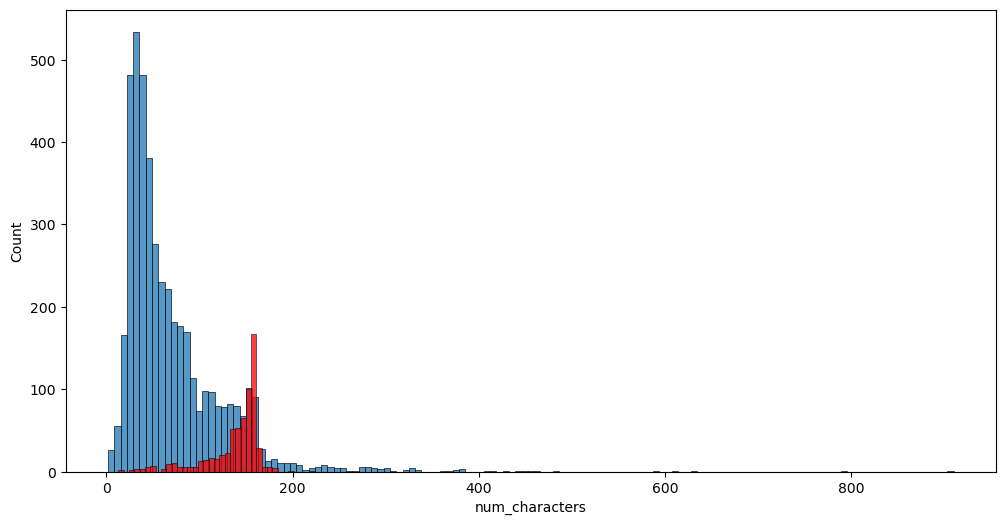

In [114]:
# visualization of num_characters
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.histplot(df[df['type'] == 0]['num_characters']) #ham
sns.histplot(df[df['type'] == 1]['num_characters'], color='red') #spam
plt.show()

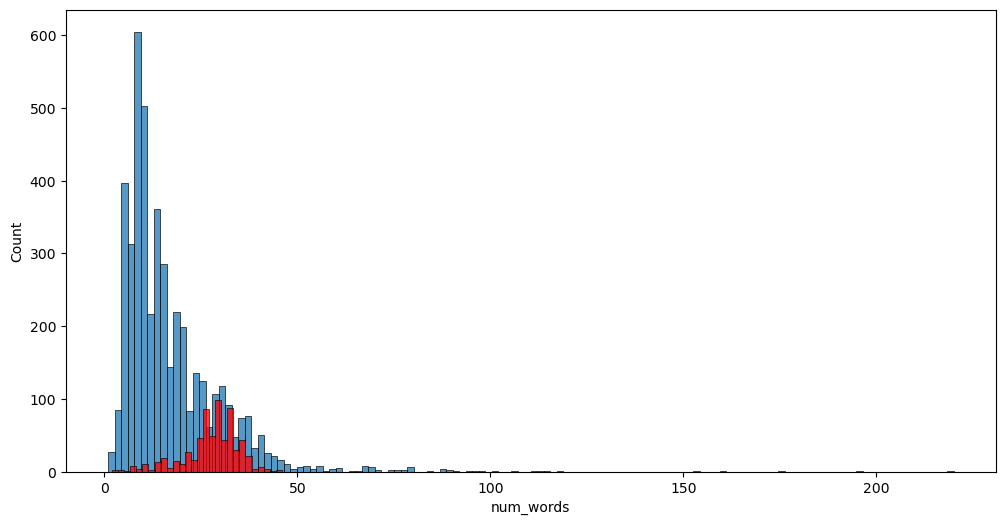

In [115]:
# visualization of num_words
plt.figure(figsize=(12, 6))
sns.histplot(df[df['type'] == 0]['num_words']) #ham
sns.histplot(df[df['type'] == 1]['num_words'], color='red') #spam
plt.show()

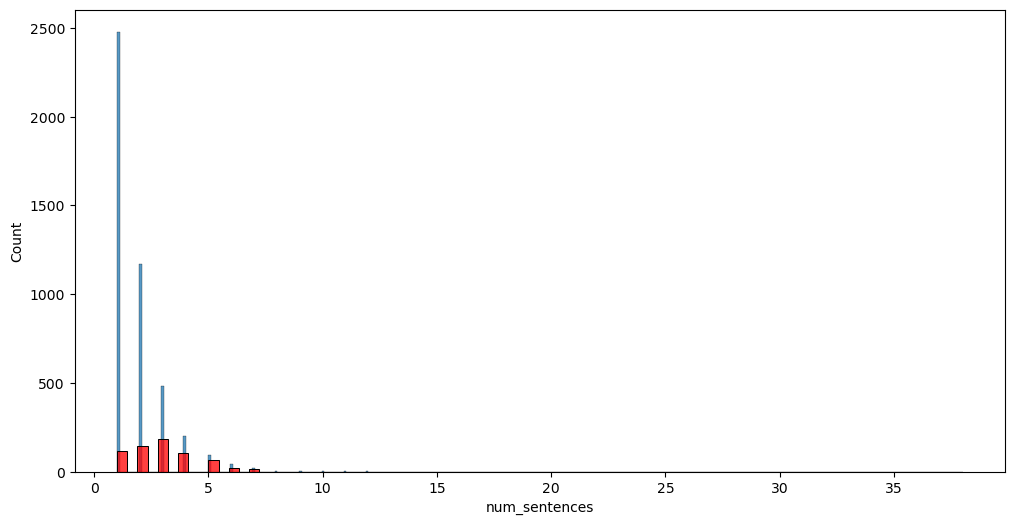

In [116]:
# visualization of num_sentences
plt.figure(figsize=(12, 6))
sns.histplot(df[df['type'] == 0]['num_sentences']) #ham
sns.histplot(df[df['type'] == 1]['num_sentences'], color='red') #spam
plt.show()

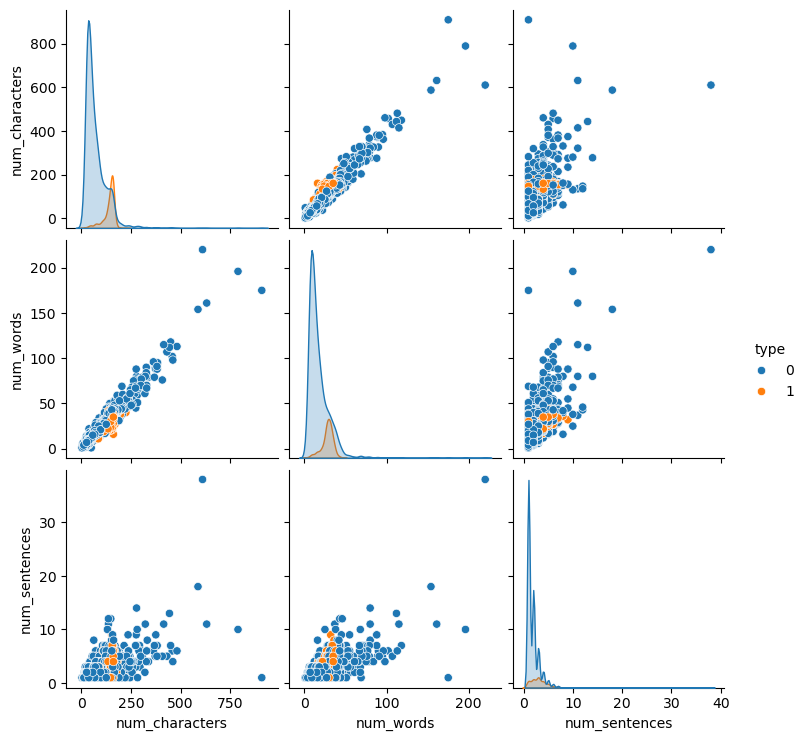

In [117]:
sns.pairplot(df, hue='type')

# Data Preprocessing

- Lower case
- Tokenization
- Removal of special characters 
- Removing stop words and punctuation 
- Stemming 

In [118]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string
def transform_text(text):
    text = text.lower() # lower case
    text = nltk.word_tokenize(text) # tokenization

    y = []
    for i in text:
        if i.isalnum(): # remove the special characters
            y.append(i) # append the alphanumeric characters to the list y
    text = y[:] # copy the list y to text
    y.clear() # clear the list y

    # removing stop words and punctuation
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:] # copy the list y to text
    y.clear() # clear the list y

    # stemming
    # stemming is the process of reducing a word to its root word
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) # join the list y to form a string

    
    

In [119]:
df['transformed_text'] = df['text'].apply(transform_text)
df['stemmed_text'] = df['transformed_text'].apply(lambda x: ps.stem(x)) # stemming
df.head()

type                                               text  num_characters  \
0     0  Go until jurong point, crazy.. Available only ...             111   
1     0                      Ok lar... Joking wif u oni...              29   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3     0  U dun say so early hor... U c already then say...              49   
4     0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  \
0         24              2   
1          8              2   
2         37              2   
3         13              1   
4         15              1   

                                    transformed_text  \
0  go jurong point crazi avail bugi n great world...   
1                              ok lar joke wif u oni   
2  free entri 2 wkli comp win fa cup final tkt 21...   
3                u dun say earli hor u c alreadi say   
4               nah think goe usf live around though   

                                        stemmed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

What is a Word Cloud?

A Word Cloud (or tag cloud) is a visual representation of text data where:

Each word’s size = how frequently it appears in the text (or its importance).

Words that appear more often are shown bigger and bolder.

🔹 Why use it?

Quickly shows the most common words in your dataset.

Helps in EDA for text data (like spam messages, reviews, tweets).

Good for presentations/reports to make patterns more obvious.

In [120]:
!pip install wordcloud

In [121]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

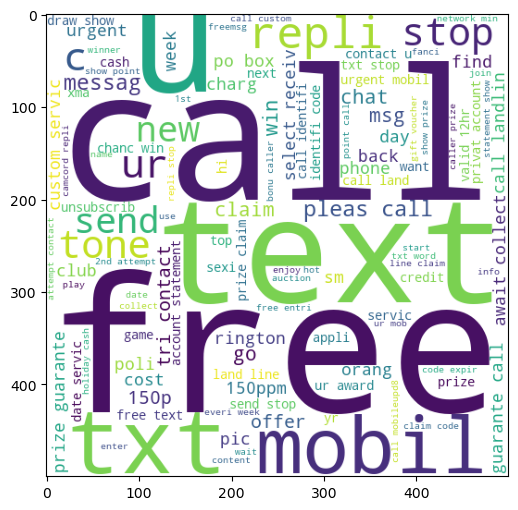

In [122]:
spam_wc = wc.generate(df[df['type'] == 1]['stemmed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

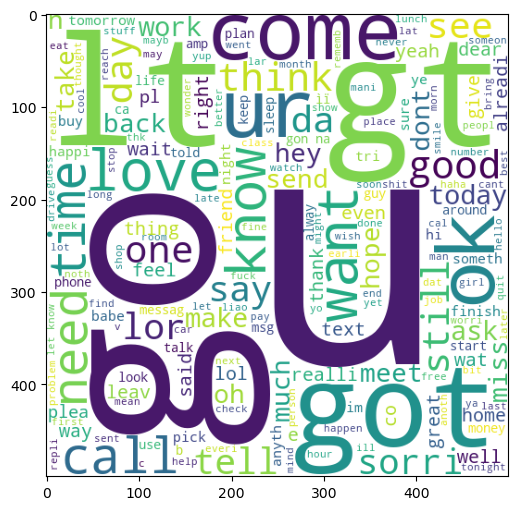

In [123]:
spam_wc = wc.generate(df[df['type'] == 0]['stemmed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [124]:
spam_corpus_1 = []
for msg in df[df['type'] == 1]['stemmed_text'].tolist():
    for word in msg.split():
        spam_corpus_1.append(word)
spam_corpus_1 = np.array(spam_corpus_1)
len(spam_corpus_1)

9939

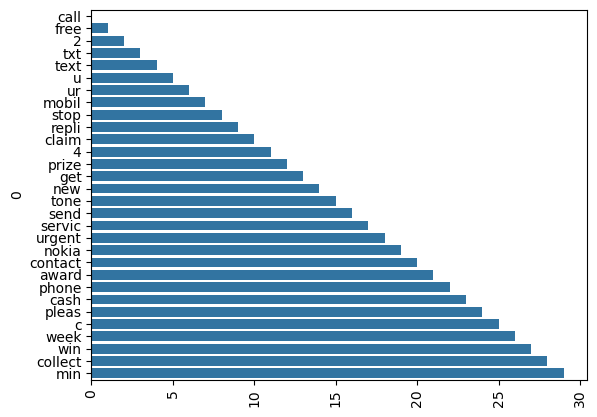

In [125]:
from collections import Counter
import seaborn as sns
sns.barplot(pd.DataFrame(Counter(spam_corpus_1).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [126]:
spam_corpus_0 = []
for msg in df[df['type'] == 0]['stemmed_text'].tolist():
    for word in msg.split():
        spam_corpus_0.append(word)
spam_corpus_0 = np.array(spam_corpus_0)
len(spam_corpus_0)

35400

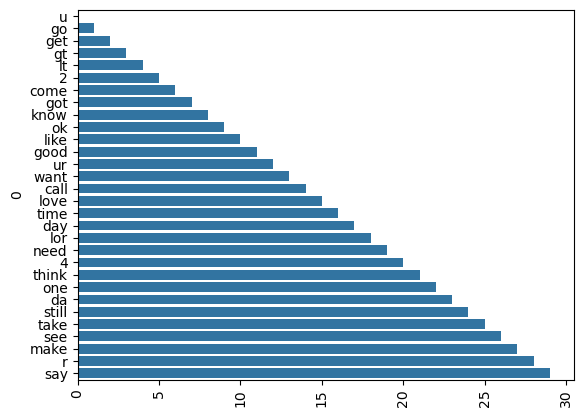

In [127]:
sns.barplot(pd.DataFrame(Counter(spam_corpus_0).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# text vectorization or converting the text data into numerical data

Model Building


In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000) # max features means we are taking only 3000 words 
# vwctorizing the text is the process of converting text into numerical data

In [129]:
X = tfid.fit_transform(df['stemmed_text']).toarray()

In [130]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [132]:
X.shape

(5169, 3000)

In [133]:
df.head()

type                                               text  num_characters  \
0     0  Go until jurong point, crazy.. Available only ...             111   
1     0                      Ok lar... Joking wif u oni...              29   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3     0  U dun say so early hor... U c already then say...              49   
4     0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  \
0         24              2   
1          8              2   
2         37              2   
3         13              1   
4         15              1   

                                    transformed_text  \
0  go jurong point crazi avail bugi n great world...   
1                              ok lar joke wif u oni   
2  free entri 2 wkli comp win fa cup final tkt 21...   
3                u dun say earli hor u c alreadi say   
4               nah think goe usf live around though   

                                        stemmed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

In [134]:
y = df['type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [136]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [137]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

GaussianNB
0.879110251450677
[[789 107]
 [ 18 120]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.87      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [138]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB")  
print(accuracy_score(y_test, y_pred2))  
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

MultinomialNB
0.9787234042553191
[[889   7]
 [ 15 123]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.89      0.92       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [139]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB")    
print(accuracy_score(y_test, y_pred3))    
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

BernoulliNB
0.9816247582205029
[[895   1]
 [ 18 120]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.87      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [140]:
from sklearn.linear_model import LogisticRegression # good for textual data
from sklearn.svm import SVC #
from sklearn.naive_bayes import MultinomialNB #
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score


In [141]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [142]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [143]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [144]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.943089430894309)

In [145]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.943089430894309
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8383838383838383
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8470588235294118
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.873015873015873
For  ETC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9173553719008265


In [146]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

Algorithm  Accuracy  Precision
2         NB  0.978723   0.946154
8        ETC  0.976789   0.975000
5         RF  0.973888   0.974359
0        SVC  0.971954   0.943089
4         LR  0.967118   0.948276
10       xgb  0.964217   0.917355
7        BgC  0.957447   0.873016
9       GBDT  0.952611   0.932039
3         DT  0.931335   0.838384
6   AdaBoost  0.923598   0.847059
1         KN  0.906190   1.000000

In [147]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

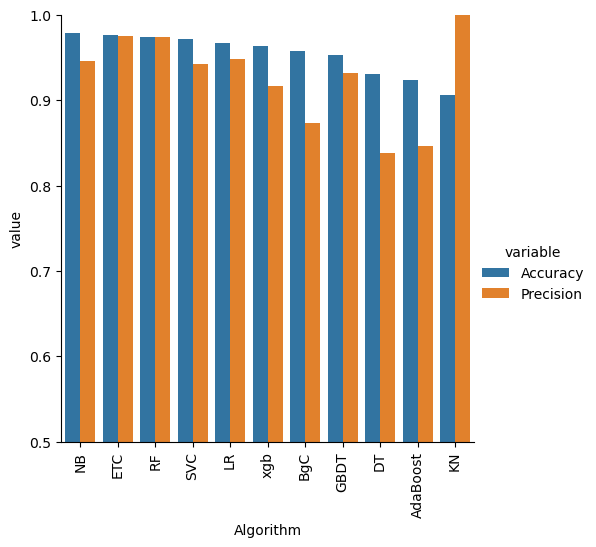

In [148]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [149]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         NB  0.978723   0.946154            0.978723             0.946154   
1        ETC  0.976789   0.975000            0.976789             0.975000   
2         RF  0.973888   0.974359            0.973888             0.974359   
3        SVC  0.971954   0.943089            0.971954             0.943089   
4         LR  0.967118   0.948276            0.967118             0.948276   
5        xgb  0.964217   0.917355            0.964217             0.917355   
6        BgC  0.957447   0.873016            0.957447             0.873016   
7       GBDT  0.952611   0.932039            0.952611             0.932039   
8         DT  0.931335   0.838384            0.931335             0.838384   
9   AdaBoost  0.923598   0.847059            0.923598             0.847059   
10        KN  0.906190   1.000000            0.906190             1.000000   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.978723             0.946154            0.978723   
1             0.976789             0.975000            0.976789   
2             0.973888             0.974359            0.973888   
3             0.971954             0.943089            0.971954   
4             0.967118             0.948276            0.967118   
5             0.964217             0.917355            0.964217   
6             0.957447             0.873016            0.957447   
7             0.952611             0.932039            0.952611   
8             0.931335             0.838384            0.931335   
9             0.923598             0.847059            0.923598   
10            0.906190             1.000000            0.906190   

    Precision_num_chars  
0              0.946154  
1              0.975000  
2              0.974359  
3              0.943089  
4              0.948276  
5              0.917355  
6              0.873016  
7              0.932039  
8              0.838384  
9              0.847059  
10             1.000000

In [150]:
from sklearn.naive_bayes import MultinomialNB
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [151]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [152]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [153]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9606299212598425


In [154]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [155]:

from sklearn.ensemble import StackingClassifier

In [156]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [157]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [158]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

In [159]:

import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))